In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [45]:
def get_results(datas, elements):
    results = {}
    for element in elements:
        for time in times:
            results[f'{element}_{time}_mean'] = []
            results[f'{element}_{time}_std'] = []
    for time in times:
        for data in datas:
            for element in elements:
                results[f'{element}_{time}_mean'].append(data[f'{element}_{time}'])
    # for time in times:
    #         for element in ['vy', 'dpsidt', 'rmse']:
    #             results[f'{element}_{time}_std'] = np.std(results[f'{element}_{time}_mean'])
    #             results[f'{element}_{time}_mean'] = np.mean(results[f'{element}_{time}_mean'])
    return results

In [46]:
# Analyse model-based

In [47]:
integration_time = [0.05, 0.5, 1.]

times = [0.05, 1, 2, 3, 5, 6, 7, 8, 9, 10]
results_ = {}
model_based_non_averaged_results = {}
for element in ['vy', 'dpsidt', 'rmse']:
    for time in times:
        results_[f'{element}_{time}_mean'] = []
        results_[f'{element}_{time}_std'] = []
        model_based_non_averaged_results[f'{element}_{time}_mean'] = []

for i in range(3):

    training_name = f'abc_smc_{i}'
    training_parameters = f'abc_smc_model_based_{i}'
    training_folder = f"./results/training_{training_name}/"
    parameters_path = f"./training_parameters/{training_parameters}.csv"

    datas = []
    for idx in range(15):
        with open(f'./results/training_{training_name}/results/rmse_{idx}.json', 'r') as file:
            datas.append(json.load(file))
    results = get_results(datas, elements=['vy', 'dpsidt', 'rmse'])

    for time in times:
        for element in ['vy', 'dpsidt', 'rmse']:
            results_[f'{element}_{time}_mean'].append(np.mean(results[f'{element}_{time}_mean']))
            results_[f'{element}_{time}_std'].append(np.std(results[f'{element}_{time}_mean']))

            model_based_non_averaged_results[f'{element}_{time}_mean'].append(results[f'{element}_{time}_mean'])
        
results_model_based = pd.DataFrame(results_)
results_model_based['Integration time'] = integration_time
results_model_based

,vy_0.05_mean,vy_0.05_std,vy_1_mean,vy_1_std,vy_2_mean,vy_2_std,vy_3_mean,vy_3_std,vy_5_mean,vy_5_std,...,rmse_6_std,rmse_7_mean,rmse_7_std,rmse_8_mean,rmse_8_std,rmse_9_mean,rmse_9_std,rmse_10_mean,rmse_10_std,Integration time
0,0.015768,0.000375,0.054920,0.002180,0.078862,0.004437,0.099678,0.009097,0.111239,0.011898,...,0.006370,0.068871,0.006603,0.072399,0.007200,0.073799,0.007522,0.076668,0.007844,0.05
1,0.016316,0.000290,0.054560,0.001626,0.075834,0.001470,0.094934,0.003574,0.105420,0.005032,...,0.002908,0.065009,0.002973,0.068499,0.003292,0.069781,0.003457,0.072779,0.003614,0.50
2,0.017101,0.000546,0.055007,0.001963,0.073857,0.001181,0.086038,0.002279,0.093186,0.003314,...,0.002101,0.057555,0.002355,0.060227,0.002595,0.061079,0.002712,0.063452,0.002985,1.00


In [48]:
training_name = 'training_final_results_bis'
training_parameters = 'physics_informed'
parameters_path = f"./training_parameters/{training_parameters}.csv"
parameters = pd.read_csv(parameters_path)

In [49]:
# Analyse des résultats de l'entraînement de la baseline MLP

In [50]:
nb_neurones_per_layers = [8, 16, 24]
future_temporal_horizons = [0.05, 0.5, 1.0]

nb_neurones_per_layers_list = []
future_temporal_horizons_list = []

times = [0.05, 1, 2, 3, 5, 6, 7, 8, 9, 10]
results_ = {}
for element in ['vy', 'psidt', 'rmse']:
    for time in times:
        results_[f'{element}_{time}_mean'] = []
        results_[f'{element}_{time}_std'] = []

for future_temporal_horizon in future_temporal_horizons:
    for nb_neurones_per_layer in nb_neurones_per_layers:

        mask1 = parameters['training_name'] == 'training_data_based_dof2'
        mask2 = (parameters['nb_neurones_per_layers'] == nb_neurones_per_layer) & (parameters['future_temporal_horizon'] == future_temporal_horizon)
        mask = mask1 & mask2
        datas = []
        for idx in parameters[mask].index:
            with open(f'./results/{training_name}/results/rmse_{idx}.json', 'r') as file:
                datas.append(json.load(file))
        results = get_results(datas, elements = ['vy', 'psidt', 'rmse'])

        for time in times:
            for element in ['vy', 'psidt', 'rmse']:
                results_[f'{element}_{time}_mean'].append(np.mean(results[f'{element}_{time}_mean']))
                results_[f'{element}_{time}_std'].append(np.std(results[f'{element}_{time}_mean']))
            
        nb_neurones_per_layers_list.append(nb_neurones_per_layer)
        future_temporal_horizons_list.append(future_temporal_horizon)

results_data_based = pd.DataFrame(results_)
results_data_based['Nb neurones per layers'] = nb_neurones_per_layers_list
results_data_based['Integration time'] = future_temporal_horizons_list

In [51]:
results_data_based

,vy_0.05_mean,vy_0.05_std,vy_1_mean,vy_1_std,vy_2_mean,vy_2_std,vy_3_mean,vy_3_std,vy_5_mean,vy_5_std,...,rmse_7_mean,rmse_7_std,rmse_8_mean,rmse_8_std,rmse_9_mean,rmse_9_std,rmse_10_mean,rmse_10_std,Nb neurones per layers,Integration time
0,0.078542,0.076944,0.935123,0.946989,1.820475,1.847125,2.690239,2.766536,4.530168,4.704078,...,4.837772,4.975008,5.620132,5.775263,6.421945,6.599978,7.199835,7.404847,8,0.05
1,0.023559,0.005989,0.237259,0.108593,0.479267,0.219407,0.706595,0.360355,1.181830,0.819648,...,1.435631,1.116773,1.738343,1.504407,2.068361,1.944392,2.406379,2.402258,16,0.05
2,0.020206,0.006097,0.185234,0.102237,0.369796,0.205783,0.526978,0.325398,0.800112,0.614818,...,1.044153,0.589777,1.198065,0.690779,1.354955,0.797816,1.509140,0.903831,24,0.05
3,0.110166,0.115962,1.286317,1.386779,2.559970,2.839152,3.874978,4.440188,6.603818,7.788398,...,5.882052,6.078841,6.886602,7.112419,7.930121,8.181725,8.953887,9.232672,8,0.50
4,0.031888,0.026886,0.345455,0.327626,0.687851,0.653814,1.013416,0.999258,1.667391,1.767768,...,2.032252,1.760918,2.374969,2.085991,2.735653,2.432846,3.095916,2.785325,16,0.50
5,0.024206,0.006572,0.244335,0.091554,0.493417,0.189008,0.724853,0.309317,1.177693,0.630023,...,1.185134,0.673319,1.372211,0.815862,1.569256,0.968185,1.767400,1.122108,24,0.50
6,0.112649,0.119372,1.333065,1.450661,2.652849,2.875014,3.993149,4.319589,6.722320,7.219174,...,6.309693,5.799913,7.284527,6.650472,8.274534,7.514064,9.227261,8.344718,8,1.00
7,0.031493,0.030487,0.327098,0.342297,0.634373,0.578207,0.923277,0.804910,1.525564,1.362188,...,1.644701,1.371588,1.883996,1.572877,2.130766,1.784036,2.371902,1.994694,16,1.00
8,0.024896,0.008628,0.212763,0.097405,0.400735,0.173410,0.547540,0.245168,0.745178,0.367729,...,0.890202,0.329539,0.986767,0.359539,1.082643,0.392337,1.174195,0.426981,24,1.00


In [53]:
datatoplot = results_data_based[['Integration time', 'Nb neurones per layers', 'vy_10_mean', 'psidt_10_mean', 'vy_10_std', 'psidt_10_std']]
datatoplot['vy_10_std'].values

array([10.00468397,  2.95949639,  1.40986451, 16.400076  ,  4.08662752,
        1.69514313, 14.36718718,  3.14258527,  0.53525279])

In [55]:
nb_neurones_per_layers = [8, 16, 24]
future_temporal_horizons = [0.05, 0.5, 1.0]

nb_neurones_per_layers_list = []
future_temporal_horizons_list = []

times = [0.05, 1, 2, 3, 5, 6, 7, 8, 9, 10]
results_ = {}
for element in ['vy', 'psidt', 'rmse']:
    for time in times:
        results_[f'{element}_{time}_mean'] = []
        results_[f'{element}_{time}_std'] = []

for future_temporal_horizon in future_temporal_horizons:
    for nb_neurones_per_layer in nb_neurones_per_layers:

        mask1 = parameters['training_name'] == 'training_discrepancy_dof2'
        mask2 = (parameters['nb_neurones_per_layers'] == nb_neurones_per_layer) & (parameters['future_temporal_horizon'] == future_temporal_horizon)
        mask = mask1 & mask2
        datas = []
        for idx in parameters[mask].index:
            with open(f'./results/{training_name}/results/rmse_{idx}.json', 'r') as file:
                datas.append(json.load(file))
        results = get_results(datas, elements = ['vy', 'psidt', 'rmse'])

        for time in times:
            for element in ['vy', 'psidt', 'rmse']:
                results_[f'{element}_{time}_mean'].append(np.mean(results[f'{element}_{time}_mean']))
                results_[f'{element}_{time}_std'].append(np.std(results[f'{element}_{time}_mean']))
            
        nb_neurones_per_layers_list.append(nb_neurones_per_layer)
        future_temporal_horizons_list.append(future_temporal_horizon)

results_discrepancy = pd.DataFrame(results_)
results_discrepancy['Nb neurones per layers'] = nb_neurones_per_layers_list
results_discrepancy['Integration time'] = future_temporal_horizons_list
results_discrepancy

/home/lionti/Documents/fabien.leonti/Dev/env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lionti/Documents/fabien.leonti/Dev/env/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/lionti/Documents/fabien.leonti/Dev/env/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lionti/Documents/fabien.leonti/Dev/env/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/lionti/Documents/fabien.leonti/Dev/env/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret =

,vy_0.05_mean,vy_0.05_std,vy_1_mean,vy_1_std,vy_2_mean,vy_2_std,vy_3_mean,vy_3_std,vy_5_mean,vy_5_std,...,rmse_7_mean,rmse_7_std,rmse_8_mean,rmse_8_std,rmse_9_mean,rmse_9_std,rmse_10_mean,rmse_10_std,Nb neurones per layers,Integration time
0,0.116651,0.116604,1.431572,1.113577,2.762430,2.377249,3.883547,3.394383,5.768004,5.187167,...,4.918690,4.645332,5.539040,5.336138,6.152322,6.055618,6.730209,6.768649,8,0.05
1,0.023484,0.007233,0.416559,0.263800,0.854290,0.640199,1.344647,1.200477,2.390763,2.662598,...,1.934968,2.537368,2.250263,3.061122,2.564982,3.593887,2.865442,4.106820,16,0.05
2,0.022951,0.006005,0.301944,0.232049,0.544183,0.472237,0.756180,0.717257,1.209601,1.427123,...,0.877295,1.206710,0.992996,1.428154,1.100033,1.633551,1.194866,1.811724,24,0.05
3,0.087435,0.075227,0.414538,0.439924,0.824052,0.796968,1.270229,1.405418,1.989697,2.371545,...,1.882621,2.544684,2.079599,2.865735,2.270463,3.187752,2.449031,3.496356,8,0.50
4,0.046704,0.040470,0.578267,0.531452,1.016838,0.914916,1.321299,1.220165,1.803120,1.837018,...,1.180921,1.308397,1.282573,1.493072,1.380320,1.674976,1.473004,1.843964,16,0.50
5,0.029732,0.013744,0.337436,0.247522,0.529282,0.387054,0.659994,0.505533,0.860486,0.770729,...,0.564510,0.597711,0.619110,0.704025,0.676331,0.823789,0.733743,0.949747,24,0.50
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1.00
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,1.00
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1.00


In [56]:
datatoplot = results_discrepancy[['Integration time', 'Nb neurones per layers', 'vy_10_mean', 'psidt_10_mean', 'vy_10_std', 'psidt_10_std']]
datatoplot['psidt_10_std'].values

array([7.78953932, 1.81796151, 0.27620771, 4.18024825, 0.20870645,
       0.30506344,        nan,        nan,        nan])

In [57]:
nb_neurones_per_layers = [8, 16, 24]
future_temporal_horizons = [0.05, 0.5, 1.0]

nb_neurones_per_layers_list = []
future_temporal_horizons_list = []

times = [0.05, 1, 2, 3, 5, 6, 7, 8, 9, 10]
results_ = {}
for element in ['vy', 'psidt', 'rmse']:
    for time in times:
        results_[f'{element}_{time}_mean'] = []
        results_[f'{element}_{time}_std'] = []

for future_temporal_horizon in future_temporal_horizons:
    for nb_neurones_per_layer in nb_neurones_per_layers:

        mask1 = parameters['training_name'] == 'training_transfer_learning_dof2'
        mask2 = (parameters['nb_neurones_per_layers'] == nb_neurones_per_layer) & (parameters['future_temporal_horizon'] == future_temporal_horizon)
        mask = mask1 & mask2
        datas = []
        for idx in parameters[mask].index:
            with open(f'./results/{training_name}/results/rmse_{idx}.json', 'r') as file:
                datas.append(json.load(file))
        results = get_results(datas, elements = ['vy', 'psidt', 'rmse'])

        for time in times:
            for element in ['vy', 'psidt', 'rmse']:
                results_[f'{element}_{time}_mean'].append(np.mean(results[f'{element}_{time}_mean']))
                results_[f'{element}_{time}_std'].append(np.std(results[f'{element}_{time}_mean']))
            
        nb_neurones_per_layers_list.append(nb_neurones_per_layer)
        future_temporal_horizons_list.append(future_temporal_horizon)

results_transfer_learning_dof2 = pd.DataFrame(results_)
results_transfer_learning_dof2['Nb neurones per layers'] = nb_neurones_per_layers_list
results_transfer_learning_dof2['Integration time'] = future_temporal_horizons_list
results_transfer_learning_dof2

,vy_0.05_mean,vy_0.05_std,vy_1_mean,vy_1_std,vy_2_mean,vy_2_std,vy_3_mean,vy_3_std,vy_5_mean,vy_5_std,...,rmse_7_mean,rmse_7_std,rmse_8_mean,rmse_8_std,rmse_9_mean,rmse_9_std,rmse_10_mean,rmse_10_std,Nb neurones per layers,Integration time
0,0.021017,0.012093,0.162023,0.147062,0.323346,0.290985,0.454889,0.436143,0.645992,0.709251,...,0.709037,0.729276,0.813897,0.814623,0.924849,0.905122,1.037367,0.997549,8,0.05
1,0.016053,0.001336,0.103355,0.020877,0.205448,0.045081,0.272060,0.070712,0.326860,0.118830,...,0.290915,0.105275,0.320164,0.125756,0.347505,0.148096,0.376685,0.169816,16,0.05
2,0.016258,0.000720,0.100930,0.014991,0.199243,0.034249,0.264276,0.054663,0.317067,0.106609,...,0.369092,0.116334,0.419989,0.144487,0.473101,0.176386,0.527888,0.209836,24,0.05
3,0.022376,0.014674,0.179527,0.180704,0.359270,0.356053,0.509970,0.532061,0.740619,0.865921,...,0.808100,0.922422,0.922496,1.032172,1.043867,1.144228,1.165161,1.254532,8,0.50
4,0.015778,0.000648,0.095759,0.011428,0.187750,0.024139,0.245036,0.037388,0.280553,0.058913,...,0.269961,0.096756,0.296477,0.120306,0.321643,0.146416,0.348158,0.172616,16,0.50
5,0.016151,0.000568,0.098723,0.011165,0.193574,0.023982,0.252470,0.037573,0.286964,0.066988,...,0.328783,0.074158,0.365286,0.091830,0.402088,0.112860,0.440911,0.137259,24,0.50
6,0.023863,0.017836,0.202057,0.218298,0.403843,0.427258,0.575994,0.635361,0.849739,1.031434,...,0.912226,1.114031,1.037915,1.251392,1.170590,1.389357,1.302951,1.522490,8,1.00
7,0.015841,0.000635,0.103087,0.021096,0.201069,0.043371,0.263015,0.063972,0.313603,0.109501,...,0.302101,0.159340,0.333997,0.197492,0.364747,0.239067,0.396412,0.282263,16,1.00
8,0.016061,0.000621,0.097188,0.009963,0.190713,0.023555,0.248836,0.037850,0.283557,0.071240,...,0.302786,0.089747,0.331005,0.104232,0.357828,0.119692,0.385757,0.136236,24,1.00


In [58]:
datatoplot = results_transfer_learning_dof2[['Integration time', 'Nb neurones per layers', 'vy_10_mean', 'psidt_10_mean', 'vy_10_std', 'psidt_10_std']]
datatoplot['psidt_10_std'].values

array([0.83344249, 0.12727636, 0.21348875, 1.13068319, 0.30484225,
       0.25680406, 1.47707915, 0.36856192, 0.20641305])

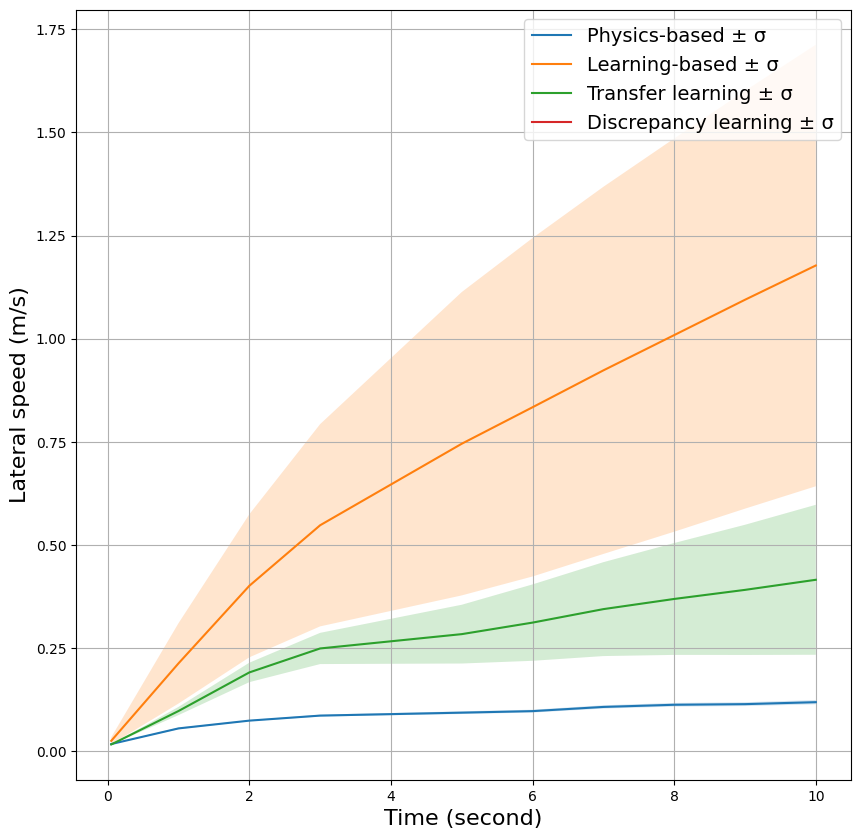

In [39]:
element = 'vy'
plt.figure(figsize = (10, 10))

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_model_based.iloc[-1][f'{element}_{time}_mean'])
    val_std.append(results_model_based.iloc[-1][f'{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Physics-based ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_data_based.iloc[-1][f'{element}_{time}_mean'])
    val_std.append(results_data_based.iloc[-1][f'{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Learning-based ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_transfer_learning_dof2.iloc[-1][f'{element}_{time}_mean'])
    val_std.append(results_transfer_learning_dof2.iloc[-1][f'{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Transfer learning ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_discrepancy.iloc[-1][f'{element}_{time}_mean'])
    val_std.append(results_discrepancy.iloc[-1][f'{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Discrepancy learning ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

plt.grid()
# plt.title('RMSE Evolution over time')
plt.legend(fontsize=14)
plt.xlabel('Time (second)', fontsize=16)
plt.ylabel('Lateral speed (m/s)', fontsize=16)
# plt.show()
plt.savefig('./figures/RMSE_over_time_vy.pdf')

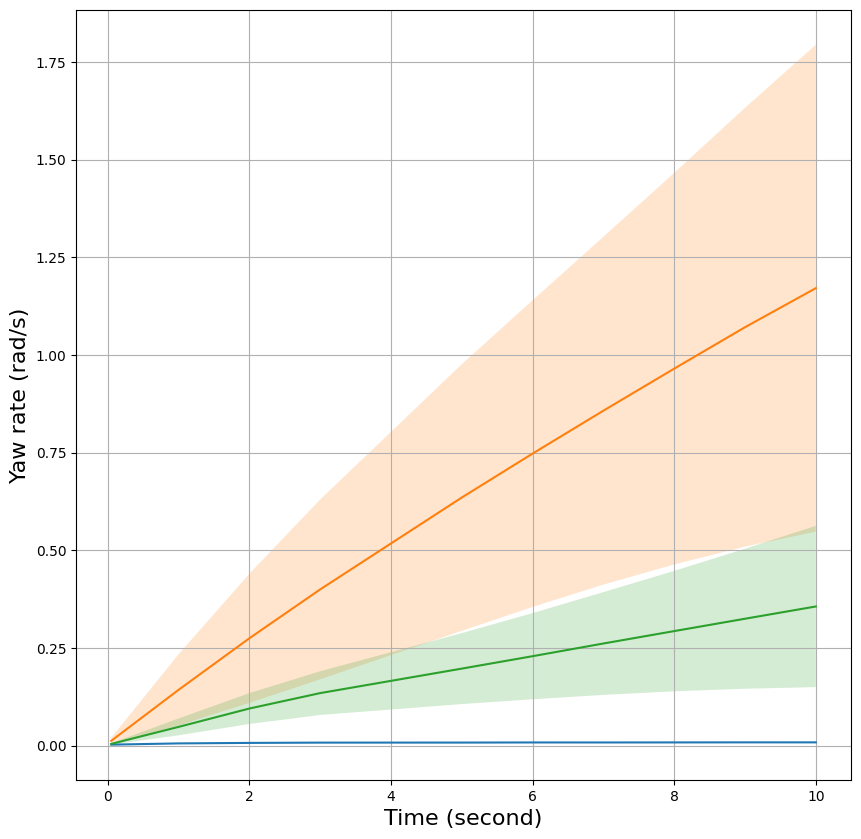

In [40]:
element = 'psidt'
plt.figure(figsize = (10, 10))

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_model_based.iloc[-1][f'd{element}_{time}_mean'])
    val_std.append(results_model_based.iloc[-1][f'd{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Physics-based ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_data_based.iloc[-1][f'{element}_{time}_mean'])
    val_std.append(results_data_based.iloc[-1][f'{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Learning-based ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_transfer_learning_dof2.iloc[-1][f'{element}_{time}_mean'])
    val_std.append(results_transfer_learning_dof2.iloc[-1][f'{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Transfer learning ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

val_mean = [] 
val_std = []
for time in times:
    val_mean.append(results_discrepancy.iloc[-1][f'{element}_{time}_mean'])
    val_std.append(results_discrepancy.iloc[-1][f'{element}_{time}_std'])
upper_bound = np.asarray(val_mean) + np.asarray(val_std)
lower_bound = np.asarray(val_mean) - np.asarray(val_std)
plt.plot(times, val_mean, label=f'Discrepancy learning ± σ')
plt.fill_between(times, lower_bound, upper_bound, alpha=0.2)

plt.grid()
# plt.title('RMSE Evolution over time')
# plt.legend()
plt.xlabel('Time (second)', fontsize=16)
plt.ylabel('Yaw rate (rad/s)', fontsize=16)
# plt.show()
plt.savefig('./figures/RMSE_over_time_psidt.pdf')

In [41]:
from utils import open_json, split_data, data_preprocessing_
import os
from tqdm import tqdm

parameter = '/home/lionti/Documents/bayesian_inference_for_vehicle_dynamic/results/training_physics_informed_bis/training_config_0.json'
config = open_json(parameter)

in_variables = config['in_states_variables']
out_variables = config['out_states_variables']
control_variables = config['control_variables']

seed = 43
nb_trajectories = 172
shuffle = True
train_set_pct = 0.5
val_set_pct = 0.3
data_dt = 0.005
subsampling_dt = 0.05
# data_path = '/home/lionti/Documents/bayesian_inference_for_vehicle_dynamic/data/february_2024_bis/final'

np.random.seed(43)

dataset_choice = 'february_2024'

# if dataset_choice == 'february_2024':
# else:
#     data_path = f'./data/duffing_oscillator/'

data_path = f'./data/february_2024_bis/final/'

data_list = []
for filename in tqdm(os.listdir(f'{data_path}')):
    data_list.append(pd.read_csv(f'{data_path}{filename}'))

(train_data_list, train_trajectories_idx, 
    val_data_list, val_trajectories_idx, 
    test_data_list, test_trajectories_idx) = split_data(data_list, nb_trajectories, shuffle, train_set_pct, val_set_pct)

100%|██████████| 173/173 [00:00<00:00, 194.50it/s]


In [42]:
test_in_state, test_in_control, test_out_state, test_out_control = data_preprocessing_(
            data_list = test_data_list.copy(),
            data_dt = data_dt,
            subsampling_dt = subsampling_dt,
            state_variables = in_variables,
            out_variables = out_variables,
            control_variables = control_variables,
            differentiate = False,
            smoothing = False,
            smoothing_parameters = {}
        )

In [43]:
import torch
from nn_architecture import Mlp_narx, discrepancy, TorchDOF2

len_trajectories = 10
device = 'cuda'

nb_neurones_per_layer = 24
future_temporal_horizon = 1.
nb_hidden_layer = 4
activation = 'tanh'
traj_idx = 19
prior_parameters_path = './nn_architecture/parameters.json'

colors = ['orange', 'green', 'red', 'blue']
methods = ['Data-based ± 0.1σ', 'Transfer-learning ± 0.1σ', 'Discrepancy ± 0.1σ', 'Physics-based ± 0.1σ']
#traj_idx = 19
#traj_idx = 18
plt.figure(figsize = (10, 10))
times = np.arange(2, 201, 1) * subsampling_dt
for _, method in enumerate(['training_data_based_dof2', 'training_transfer_learning_dof2', 'training_discrepancy_dof2', 'model_based']):

    if method == 'training_data_based_dof2' or method == 'training_transfer_learning_dof2' or method == 'training_discrepancy_dof2':
        mask1 = parameters['training_name'] == method
        mask2 = parameters['nb_neurones_per_layers'] == nb_neurones_per_layer
        mask3 = parameters['future_temporal_horizon'] == future_temporal_horizon
        mask = mask1 & mask2 & mask3
        training_indexes = parameters[mask].index
    else:
        training_indexes = range(15)

    datas = []
    for training_idx in training_indexes:

        data_dt = parameters.iloc[idx]['data_dt']
        subsampling_dt = parameters.iloc[idx]['subsampling_dt']

        if method == 'training_discrepancy_dof2':
            model = discrepancy(
                input_size = len(in_variables) + len(control_variables),
                nb_hidden_layer = nb_hidden_layer,
                nb_neurones_per_hidden_layer = nb_neurones_per_layer,
                output_size = len(in_variables),
                activation = activation,
                sequence_duration = data_dt,
                dt = subsampling_dt,
                delay = data_dt,
                parameter_path = prior_parameters_path)
            model.load_state_dict(torch.load(f'./results/training_physics_informed_bis/best_model_{training_idx}.pt'))
            model.to(device)
            model.eval()
        if method == 'training_data_based_dof2' or method == 'training_transfer_learning_dof2':
            model = Mlp_narx(
                            input_size = len(in_variables) + len(control_variables),
                            nb_hidden_layer = nb_hidden_layer,
                            nb_neurones_per_hidden_layer = nb_neurones_per_layer,
                            output_size = len(in_variables),
                            activation = activation,
                            sequence_duration=data_dt,
                            dt = subsampling_dt,
                            delay = data_dt 
                        )
            model.load_state_dict(torch.load(f'./results/training_physics_informed_bis/best_model_{training_idx}.pt'))
            model.to(device)
            model.eval()
        if method == 'model_based':
            model = TorchDOF2(
                parameters_path = prior_parameters_path, 
                dt = subsampling_dt,
                output_format = 'speed',
                seed=training_idx)
            model.load_state_dict(torch.load(f'./results/training_abc_smc_2/best_model_{training_idx}.pt'))
            model.to(device)
            model.eval()

        nb_test_trajectories = len(test_in_state)
        sequence_duration = 10
        s = 0
        nb_step = int(len_trajectories / subsampling_dt) - 1 - s

        X_in_tensor = torch.zeros((nb_test_trajectories, nb_step, len(in_variables))).to(device)
        U_in_tensor = torch.zeros((nb_test_trajectories, nb_step, len(control_variables))).to(device)
        X_out_tensor = torch.zeros((nb_test_trajectories, nb_step, len(out_variables))).to(device)
        X_predictions_tensor = torch.zeros((nb_test_trajectories, nb_step, len(out_variables))).to(device)
            
        # Fill tensor test_in_state, test_in_control, test_out_state
        for idx, (X_in, X_out, U_in) in enumerate(zip(test_in_state, test_out_state, test_in_control)):
            X_in_tensor[idx] = torch.tensor(X_in[s:])
            X_out_tensor[idx] = torch.tensor(X_out[s:])
            U_in_tensor[idx] = torch.tensor(U_in[s:])
            
        pred = X_in_tensor[: ,0] + model(X_in_tensor[: ,0], U_in_tensor[:, 0])
        X_predictions_tensor[:, 0, :] = pred.clone()
        for step in range(1, nb_step):
            pred = pred + model(pred, U_in_tensor[:, step])
            X_predictions_tensor[:, step, :] = pred.clone()

        datas.append(X_predictions_tensor[traj_idx, :, 0].detach().cpu().numpy())
        
    datas = np.asarray(datas)
    mean = datas.mean(axis=0)
    std = datas.std(axis=0)

    plt.plot(times, mean, colors[_], label=methods[_])

    upper_bound = mean + std * 0.5
    lower_bound = mean - std * 0.5
    plt.fill_between(times, lower_bound, upper_bound, alpha=0.2, color=colors[_])

plt.plot(times, X_out_tensor[traj_idx, :, 0].detach().cpu().numpy(), 'black', alpha=1)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Lateral speed (m/s)', fontsize = 16)
plt.legend(fontsize = 16)
plt.grid()
plt.show()
plt.savefig('./figures/lateral_speed_trajectory.pdf')

/home/lionti/Documents/IEEE_RAL_code/nn_architecture/architecture.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('std', torch.tensor(torch.tensor([[1] * self.output_size]).float()))


RuntimeError: Error(s) in loading state_dict for Mlp_narx:
	size mismatch for fc.layers.layer_0.weight: copying a param with shape torch.Size([16, 4]) from checkpoint, the shape in current model is torch.Size([24, 4]).
	size mismatch for fc.layers.layer_0.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for fc.layers.layer_1.weight: copying a param with shape torch.Size([16, 16]) from checkpoint, the shape in current model is torch.Size([24, 24]).
	size mismatch for fc.layers.layer_1.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for fc.layers.layer_2.weight: copying a param with shape torch.Size([16, 16]) from checkpoint, the shape in current model is torch.Size([24, 24]).
	size mismatch for fc.layers.layer_2.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for fc.layers.layer_3.weight: copying a param with shape torch.Size([16, 16]) from checkpoint, the shape in current model is torch.Size([24, 24]).
	size mismatch for fc.layers.layer_3.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([24]).
	size mismatch for fc.layers.layer_4.weight: copying a param with shape torch.Size([2, 16]) from checkpoint, the shape in current model is torch.Size([2, 24]).

<Figure size 1000x1000 with 0 Axes>

/home/lionti/Documents/bayesian_inference_for_vehicle_dynamic/nn_architecture/architecture.py:127: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer('std', torch.tensor(torch.tensor([[1] * self.output_size]).float()))
/home/lionti/Documents/bayesian_inference_for_vehicle_dynamic/nn_architecture/vehicle_architecture.py:238: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_parameter(name=name, param=torch.nn.Parameter(torch.tensor(value).unsqueeze(dim=0).float(), requires_grad=requires_grad))
/home/lionti/Documents/bayesian_inference_for_vehicle_dynamic/nn_architecture/vehicle_architecture.py:362: UserWarning: To copy construct from a tensor, it is recommended t

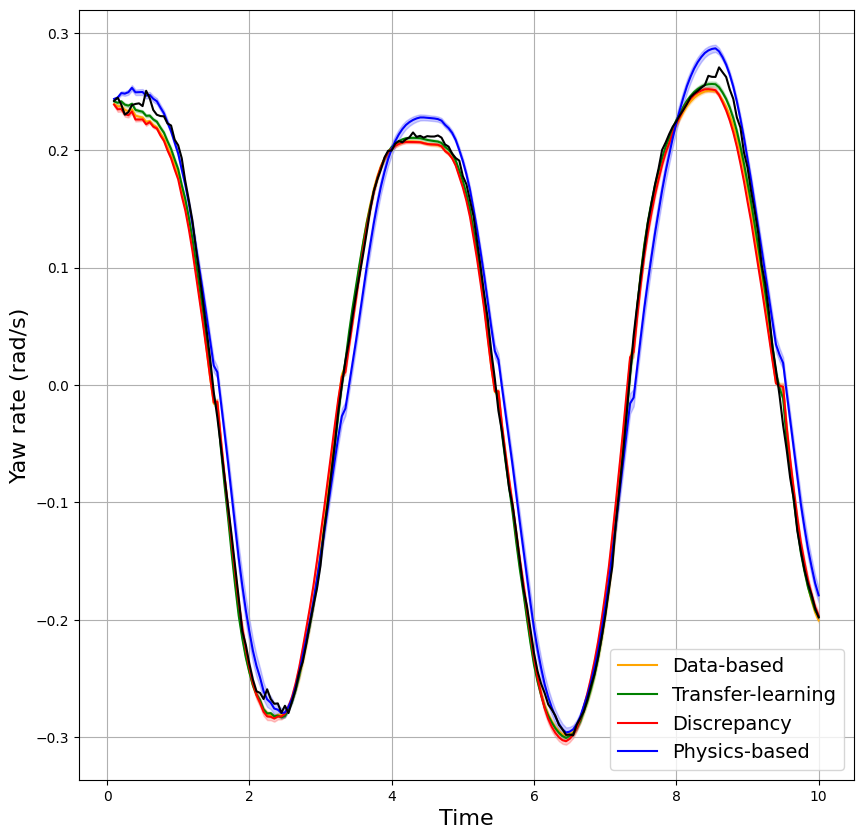

<Figure size 640x480 with 0 Axes>

In [40]:
import torch
from nn_architecture import Mlp_narx, discrepancy, TorchDOF2

len_trajectories = 10
device = 'cuda'

nb_neurones_per_layer = 24
future_temporal_horizon = 1.
nb_hidden_layer = 4
activation = 'tanh'
traj_idx = 19
prior_parameters_path = './nn_architecture/parameters.json'

colors = ['orange', 'green', 'red', 'blue']
methods = ['Data-based', 'Transfer-learning', 'Discrepancy', 'Physics-based']
#traj_idx = 19
#traj_idx = 18
plt.figure(figsize = (10, 10))
times = np.arange(2, 201, 1) * subsampling_dt
for _, method in enumerate(['training_data_based_dof2', 'training_transfer_learning_dof2', 'training_discrepancy_dof2', 'model_based']):

    if method == 'training_data_based_dof2' or method == 'training_transfer_learning_dof2' or method == 'training_discrepancy_dof2':
        mask1 = parameters['training_name'] == method
        mask2 = parameters['nb_neurones_per_layers'] == nb_neurones_per_layer
        mask3 = parameters['future_temporal_horizon'] == future_temporal_horizon
        mask = mask1 & mask2 & mask3
        training_indexes = parameters[mask].index
    else:
        training_indexes = range(15)

    datas = []
    for training_idx in training_indexes:

        data_dt = parameters.iloc[idx]['data_dt']
        subsampling_dt = parameters.iloc[idx]['subsampling_dt']

        if method == 'training_discrepancy_dof2':
            model = discrepancy(
                input_size = len(in_variables) + len(control_variables),
                nb_hidden_layer = nb_hidden_layer,
                nb_neurones_per_hidden_layer = nb_neurones_per_layer,
                output_size = len(in_variables),
                activation = activation,
                sequence_duration = data_dt,
                dt = subsampling_dt,
                delay = data_dt,
                parameter_path = prior_parameters_path)
            model.load_state_dict(torch.load(f'./results/training_physics_informed_bis/best_model_{training_idx}.pt'))
            model.to(device)
            model.eval()
        if method == 'training_data_based_dof2' or method == 'training_transfer_learning_dof2':
            model = Mlp_narx(
                            input_size = len(in_variables) + len(control_variables),
                            nb_hidden_layer = nb_hidden_layer,
                            nb_neurones_per_hidden_layer = nb_neurones_per_layer,
                            output_size = len(in_variables),
                            activation = activation,
                            sequence_duration=data_dt,
                            dt = subsampling_dt,
                            delay = data_dt 
                        )
            model.load_state_dict(torch.load(f'./results/training_physics_informed_bis/best_model_{training_idx}.pt'))
            model.to(device)
            model.eval()
        if method == 'model_based':
            model = TorchDOF2(
                parameters_path = prior_parameters_path, 
                dt = subsampling_dt,
                output_format = 'speed',
                seed=training_idx)
            model.load_state_dict(torch.load(f'./results/training_abc_smc_2/best_model_{training_idx}.pt'))
            model.to(device)
            model.eval()

        nb_test_trajectories = len(test_in_state)
        sequence_duration = 10
        s = 0
        nb_step = int(len_trajectories / subsampling_dt) - 1 - s

        X_in_tensor = torch.zeros((nb_test_trajectories, nb_step, len(in_variables))).to(device)
        U_in_tensor = torch.zeros((nb_test_trajectories, nb_step, len(control_variables))).to(device)
        X_out_tensor = torch.zeros((nb_test_trajectories, nb_step, len(out_variables))).to(device)
        X_predictions_tensor = torch.zeros((nb_test_trajectories, nb_step, len(out_variables))).to(device)
            
        # Fill tensor test_in_state, test_in_control, test_out_state
        for idx, (X_in, X_out, U_in) in enumerate(zip(test_in_state, test_out_state, test_in_control)):
            X_in_tensor[idx] = torch.tensor(X_in[s:])
            X_out_tensor[idx] = torch.tensor(X_out[s:])
            U_in_tensor[idx] = torch.tensor(U_in[s:])
            
        pred = X_in_tensor[: ,0] + model(X_in_tensor[: ,0], U_in_tensor[:, 0])
        X_predictions_tensor[:, 0, :] = pred.clone()
        for step in range(1, nb_step):
            pred = pred + model(pred, U_in_tensor[:, step])
            X_predictions_tensor[:, step, :] = pred.clone()

        datas.append(X_predictions_tensor[traj_idx, :, 1].detach().cpu().numpy())
        
    datas = np.asarray(datas)
    mean = datas.mean(axis=0)
    std = datas.std(axis=0)

    plt.plot(times, mean, colors[_], label=methods[_])

    upper_bound = mean + std * 0.5
    lower_bound = mean - std * 0.5
    plt.fill_between(times, lower_bound, upper_bound, alpha=0.2, color=colors[_])

plt.plot(times, X_out_tensor[traj_idx, :, 1].detach().cpu().numpy(), 'black', alpha=1)
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Yaw rate (rad/s)', fontsize = 16)
plt.legend(fontsize = 16)
plt.grid()
plt.show()
plt.savefig('./figures/yaw_rate_trajectory.pdf')